In [2]:
#used to install kaggle package
!pip install -q kaggle

In [3]:
# provides functions for uploading and downloading files.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ashishsinghpanwar","key":"3dc02a311a8ddcc03a62cd48afc5cdeb"}'}

In [4]:
#makes directory named kaggle in users home directory
!mkdir ~/.kaggle

In [5]:
#use to copy file to kaggle directory
!cp kaggle.json ~/.kaggle/

In [6]:
#used to change mode of file to read and write for the user
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets list

ref                                                   title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
sudarshan24byte/online-food-dataset                   Online Food Dataset                                  3KB  2024-03-02 18:50:30          11473        223  0.9411765        
syedanwarafridi/vehicle-sales-data                    Vehicle Sales Data                                  19MB  2024-02-21 20:16:17          20363        353  1.0              
bhavikjikadara/student-study-performance              Student Study Performance                            9KB  2024-03-07 06:14:09           6198         97  1.0              
julianoorlandi/spotify-top-songs-and-audio-features   Spotify Top Songs and Audio Features               526KB  202

In [8]:
!kaggle datasets download -d poornimasingh/plant-village

100% 816M/817M [00:51<00:00, 18.3MB/s]
100% 817M/817M [00:51<00:00, 16.5MB/s]


In [9]:
import zipfile
zip_ref=zipfile.ZipFile('plant-village.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

# **Import Libraries**

In [10]:
import numpy as np
import seaborn as sns
from keras.models import Sequential
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import VGG16

# **Data Augmentation**


In [11]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)  #no
test_datagen=ImageDataGenerator(rescale=1./255)

# **Load Dataset**

In [12]:
train = train_datagen.flow_from_directory("/content/split/train",
                                                    target_size=(225, 225),
                                                    batch_size=64,
                                                    class_mode='categorical')

validation = val_datagen.flow_from_directory("/content/split/val",
                                                        target_size=(225, 225),
                                                        batch_size=64,
                                                        class_mode='categorical')
test = test_datagen.flow_from_directory("/content/split/test",
                                                   target_size=(225, 225),
                                                   batch_size=64,
                                                   class_mode='categorical')

Found 43955 images belonging to 38 classes.
Found 4902 images belonging to 38 classes.
Found 5448 images belonging to 38 classes.


# **Model**

In [13]:
# Load the pre-trained VGG16 model without the top layers
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(225, 225, 3))

# Freeze the VGG16 layers
for layer in vgg_base.layers:
    layer.trainable = False

model = Sequential()

# Add the VGG16 base model
model.add(vgg_base)

# Add a flatten layer to flatten the output from the VGG16 base
model.add(Flatten())

# Add a dense layer with 64 neurons and ReLU activation
model.add(Dense(64, activation='relu'))

# Add the output layer with 38 neurons and softmax activation
model.add(Dense(38, activation='softmax'))

58889256/58889256 [==============================] - 4s 0us/step


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 64)                1605696   
                                                                 
 dense_1 (Dense)             (None, 38)                2470      
                                                                 
Total params: 16322854 (62.27 MB)
Trainable params: 1608166 (6.13 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [15]:
#configure learning process of the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# **Model Training**

In [16]:
history = model.fit(train,
                    batch_size=64,
                    epochs=5,
                    validation_data=validation,
                    validation_batch_size=64
                    )

Epoch 1/5
687/687 [==============================] - 707s 1s/step - loss: 1.0266 - accuracy: 0.7178 - val_loss: 0.5226 - val_accuracy: 0.8417
Epoch 2/5
687/687 [==============================] - 675s 982ms/step - loss: 0.4242 - accuracy: 0.8656 - val_loss: 0.3620 - val_accuracy: 0.8807
Epoch 3/5
687/687 [==============================] - 635s 924ms/step - loss: 0.3239 - accuracy: 0.8946 - val_loss: 0.3469 - val_accuracy: 0.8835
Epoch 4/5
687/687 [==============================] - 623s 906ms/step - loss: 0.2816 - accuracy: 0.9071 - val_loss: 0.3155 - val_accuracy: 0.8949
Epoch 5/5
687/687 [==============================] - 620s 902ms/step - loss: 0.2444 - accuracy: 0.9188 - val_loss: 0.3587 - val_accuracy: 0.8803


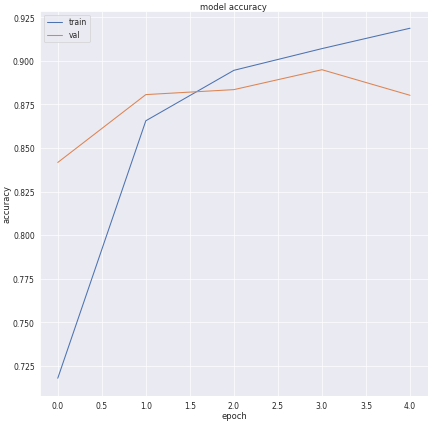

In [17]:
#plotting the graph for accuracy vs epoch
sns.set_theme()
sns.set_context("poster")

figure(figsize=(20, 20), dpi=25)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [18]:
#save the model
model.save("plantmodelvgg16.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
labels = train.class_indices
labels = {v: k for k, v in labels.items()}
labels

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

# **Image Preprocessing**

In [20]:
def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    print(x.shape)
    x = np.expand_dims(x, axis=0)
    print(x.shape)
    return x

# **Model Evaluation**

In [21]:
#preprocessing the given image
x = preprocess_image("/content/split/test/Blueberry___healthy/04e3318d-104f-474f-b9ea-d630f366edac___RS_HL 5492.JPG")

(225, 225, 3)
(1, 225, 225, 3)


In [22]:
#making predictions
predictions = model.predict(x)
predictions[0]

1/1 [==============================] - 1s 1s/step


array([6.7202724e-05, 2.6616681e-06, 7.0926421e-07, 2.0798520e-04,
       9.0505099e-01, 1.2321945e-05, 3.2382257e-08, 1.6517325e-16,
       2.8238176e-11, 7.4382748e-12, 2.0700387e-08, 4.2610908e-16,
       1.2148678e-15, 2.2512115e-14, 1.6082105e-08, 3.4926247e-04,
       1.3764796e-06, 6.6222958e-03, 2.0110304e-03, 8.4143445e-02,
       4.1973994e-08, 9.6526835e-04, 1.9855570e-04, 2.1721376e-06,
       2.5703228e-04, 7.0588231e-12, 4.7512565e-14, 1.2593582e-11,
       5.8956548e-11, 2.1558431e-09, 8.6000978e-07, 5.6000744e-08,
       3.3938045e-07, 1.0516450e-04, 8.0396308e-07, 4.2093404e-10,
       2.0843640e-09, 3.7013967e-07], dtype=float32)

Blueberry___healthy


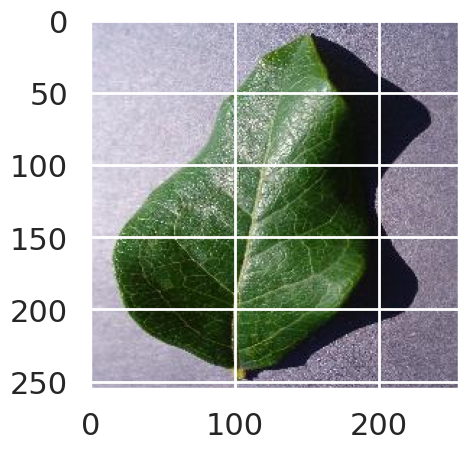

In [23]:
predicted_label = labels[np.argmax(predictions)]
print(predicted_label)
disease = image.load_img('/content/split/test/Blueberry___healthy/04e3318d-104f-474f-b9ea-d630f366edac___RS_HL 5492.JPG')
plt.imshow(disease)

In [24]:
#load the saved model
model=load_model('/content/plantmodelvgg16.h5')

(225, 225, 3)
(1, 225, 225, 3)
1/1 [==============================] - 0s 143ms/step
Tomato___Late_blight


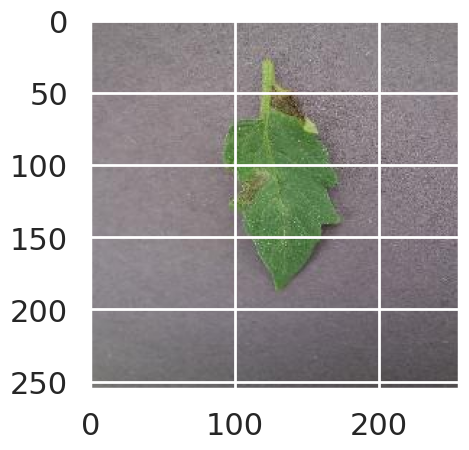

In [25]:
x = preprocess_image("/content/split/test/Tomato___Late_blight/02a3e0cd-04da-4e08-b929-167bcb7f46f4___GHLB2 Leaf 8731.JPG")
predictions = model.predict(x)
predicted_label = labels[np.argmax(predictions)]
print(predicted_label)
disease = image.load_img('/content/split/test/Tomato___Late_blight/02a3e0cd-04da-4e08-b929-167bcb7f46f4___GHLB2 Leaf 8731.JPG')
plt.imshow(disease)
